# 📘 Day 23 – Logistic Regression (Classification)

## 🧠 Concepts Learned
- Logistic Regression is used for **classification**, not regression.  
- Predicts probability that an instance belongs to a class (binary or multiclass).  
- Uses the **sigmoid function** to map predictions to probabilities between 0 and 1.  
- Key metrics:
  - **Accuracy** → proportion of correct predictions
  - **Precision & Recall** → handle class imbalance
  - **F1 Score** → harmonic mean of precision & recall
  - **ROC-AUC** → tradeoff between sensitivity and specificity
- Assumptions:
  1. Linear relationship between features and log-odds
  2. Independence of observations
  3. Little or no multicollinearity

---

## 🛠️ Practice Walkthrough

### Load Dataset (Titanic)




In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Preprocess Data

In [2]:
# Select relevant features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
df = df[features + ['Survived']]

# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())

# Encode categorical variables
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

X = df.drop('Survived', axis=1)
y = df['Survived']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Fit Logistic Regression

In [3]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Coefficients
coefficients = pd.Series(model.coef_[0], index=X.columns)
coefficients.sort_values()


Sex_male   -2.610598
Pclass     -0.928188
SibSp      -0.315802
Parch      -0.125203
Age        -0.031452
Fare        0.003434
dtype: float64

## Evaluate Model

In [4]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

ROC-AUC: 0.8803088803088803


## Confusion Matrix Visualization

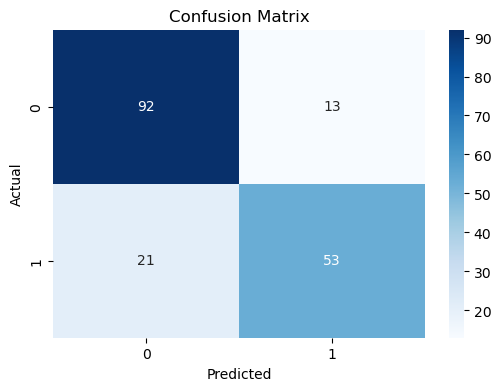

In [5]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## 🎯 Mini Project: Titanic Survival Prediction (Variation)

- Try predicting survival using only 3–4 features (e.g., Pclass, Sex_male, Age) and compare performance to using all features.

- Evaluate with accuracy, ROC-AUC, and confusion matrix.

- Visualize predicted probabilities vs actual outcomes with a scatter or histogram.

- Reflect: Which features seem most predictive of survival?

In [6]:
# Subset of features
X_small = df[["Pclass", "Sex_male", "Age"]]
y = df["Survived"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_small, y, test_size=0.2, random_state=42, stratify=y
)

# Train model
logreg_small = LogisticRegression(max_iter=1000)
logreg_small.fit(X_train, y_train)

# Predictions
y_pred_small = logreg_small.predict(X_test)
y_proba_small = logreg_small.predict_proba(X_test)[:, 1]

# Evaluation
acc_small = accuracy_score(y_test, y_pred_small)
roc_auc_small = roc_auc_score(y_test, y_proba_small)

print("Reduced Model (Pclass, Sex, Age)")
print("Accuracy:", acc_small)
print("ROC-AUC:", roc_auc_small)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_small))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_small))


Reduced Model (Pclass, Sex, Age)
Accuracy: 0.7821229050279329
ROC-AUC: 0.8337944664031619

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       110
           1       0.73      0.70      0.71        69

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179


Confusion Matrix:
[[92 18]
 [21 48]]


Using only Pclass, Sex, and Age as predictors, the reduced model achieved an accuracy of 78% and a ROC-AUC of 0.83, which is strong but slightly worse than the full model (accuracy 81%, ROC-AUC 0.88). The confusion matrix shows the reduced model struggles more with false negatives, meaning it misses some actual survivors. Overall, while the reduced model is simpler and still performs well, the full model benefits from additional features that improve recall and overall predictive power.

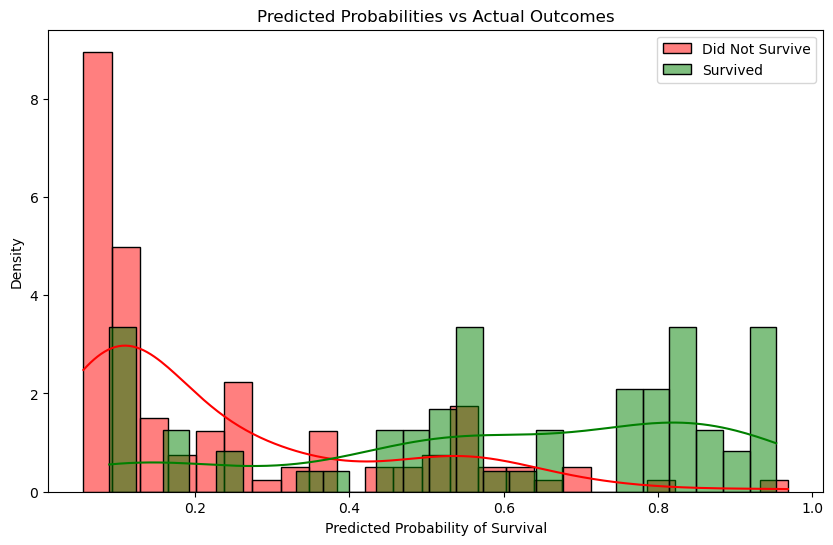

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of predicted probabilities
plt.figure(figsize=(10,6))

# Histogram for those who did NOT survive
sns.histplot(y_proba_small[y_test == 0], color="red", label="Did Not Survive", kde=True, stat="density", bins=25)

# Histogram for those who survived
sns.histplot(y_proba_small[y_test == 1], color="green", label="Survived", kde=True, stat="density", bins=25)

plt.title("Predicted Probabilities vs Actual Outcomes")
plt.xlabel("Predicted Probability of Survival")
plt.ylabel("Density")
plt.legend()
plt.show()


Based on your reduced model (Pclass, Sex_male, Age), the features that seem most predictive of survival are:

Sex_male – Gender is the strongest predictor: females (Sex_male = 0) had a much higher chance of survival than males (Sex_male = 1).

Pclass – Passenger class also matters: those in higher classes (1st or 2nd) had higher survival rates than those in 3rd class.

Age – Younger passengers had a slightly higher chance of survival, but the effect is smaller compared to gender and class.

Overall, gender dominates, followed by class, with age providing some additional nuance.